<a href="https://colab.research.google.com/github/cpython-projects/python_da_06_11_25/blob/main/lesson_12_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1.** Завантажте датасет Titanic ([https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv))

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 2.** Залиште тільки необхідні стовпці:
`'PassengerId', 'Name', 'Age', 'Sex', 'Survived', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Embarked'`

In [3]:
df_new = df[['PassengerId', 'Name', 'Age', 'Sex', 'Survived', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Embarked']]
df_new.head()

,PassengerId,Name,Age,Sex,Survived,SibSp,Parch,Fare,Pclass,Embarked
0,1,"Braund, Mr. Owen Harris",22.0,male,0,1,0,7.2500,3,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,1,0,71.2833,1,C
2,3,"Heikkinen, Miss. Laina",26.0,female,1,0,0,7.9250,3,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,1,0,53.1000,1,S
4,5,"Allen, Mr. William Henry",35.0,male,0,0,0,8.0500,3,S


**Task 3.**
* Виведіть кількість рядків і стовпців
* Скільки унікальних значень у стовпці `Embarked`?
* Який максимальний і мінімальний вік пасажирів?

In [5]:
rows_num, cols_num = df_new.shape
print(f'Кількість рядків: {rows_num}')
print(f'Кількість стовпців: {cols_num}')

Кількість рядків: 891
Кількість стовпців: 10


In [6]:
df_new['Embarked'].nunique()

3

In [7]:
df_new.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df_new.Embarked.nunique()

3

In [10]:
res = df_new.Embarked.dropna().unique()
for item in res:
    print(item)

S
C
Q


In [15]:
max(df_new.Age), min(df_new.Age), df_new.Age.max(), df_new.Age.min()

(80.0, 0.42, 80.0, 0.42)

**Task 4.**
* Додайте стовпець `IsAlone`, у якому буде `True`, якщо пасажир подорожував один (`FamilySize == 1`), інакше `False`
* Перейменуйте стовпець `Sex` на `Gender`

In [17]:
df_new['FamilySize'] = df_new['SibSp'] + df_new['Parch'] + 1
df_new['IsAlone'] = df_new['FamilySize'] == 1
df_new.head()

/tmp/ipython-input-3982749682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['FamilySize'] = df_new['SibSp'] + df_new['Parch'] + 1


,PassengerId,Name,Age,Sex,Survived,SibSp,Parch,Fare,Pclass,Embarked,FamilySize,IsAlone
0,1,"Braund, Mr. Owen Harris",22.0,male,0,1,0,7.2500,3,S,2,False
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,1,0,71.2833,1,C,2,False
2,3,"Heikkinen, Miss. Laina",26.0,female,1,0,0,7.9250,3,S,1,True
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,1,0,53.1000,1,S,2,False
4,5,"Allen, Mr. William Henry",35.0,male,0,0,0,8.0500,3,S,1,True


**Task 5.**
* Виведіть усіх жінок, які подорожували в 1-му класі (`Pclass == 1`)
* Знайдіть чоловіків, які їхали з 2 або більше родичами (`FamilySize >= 3`) і не вижили
* Виведіть пасажирів, які заплатили за квиток більше 100

In [18]:
df_female = df_new[(df_new.Sex == 'female') & (df_new.Pclass == 1)]
df_female.head()

,PassengerId,Name,Age,Sex,Survived,SibSp,Parch,Fare,Pclass,Embarked,FamilySize,IsAlone
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,1,0,71.2833,1,C,2,False
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,1,0,53.1000,1,S,2,False
11,12,"Bonnell, Miss. Elizabeth",58.0,female,1,0,0,26.5500,1,S,1,True
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,female,1,1,0,146.5208,1,C,2,False
52,53,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,female,1,1,0,76.7292,1,C,2,False


In [19]:
df_male = df_new[(df_new.Sex == 'male') & (df_new.FamilySize > 2) & (df_new.Survived == 0)]
df_male.head()

,PassengerId,Name,Age,Sex,Survived,SibSp,Parch,Fare,Pclass,Embarked,FamilySize,IsAlone
7,8,"Palsson, Master. Gosta Leonard",2.0,male,0,3,1,21.0750,3,S,5,False
13,14,"Andersson, Mr. Anders Johan",39.0,male,0,1,5,31.2750,3,S,7,False
16,17,"Rice, Master. Eugene",2.0,male,0,4,1,29.1250,3,Q,6,False
27,28,"Fortune, Mr. Charles Alexander",19.0,male,0,3,2,263.0000,1,S,6,False
48,49,"Samaan, Mr. Youssef",NaN,male,0,2,0,21.6792,3,C,3,False


**Task 6.**
* Відсортуйте пасажирів за вартістю квитка у спадному порядку
* Виведіть 10 наймолодших пасажирів, які вижили
* Відсортуйте спочатку за `Pclass`, а потім за `Age` у зростаючому порядку

In [20]:
df_new = df_new.sort_values(by='Fare', ascending=False)
df_new.head()

,PassengerId,Name,Age,Sex,Survived,SibSp,Parch,Fare,Pclass,Embarked,FamilySize,IsAlone
679,680,"Cardeza, Mr. Thomas Drake Martinez",36.0,male,1,0,1,512.3292,1,C,2,False
258,259,"Ward, Miss. Anna",35.0,female,1,0,0,512.3292,1,C,1,True
737,738,"Lesurer, Mr. Gustave J",35.0,male,1,0,0,512.3292,1,C,1,True
88,89,"Fortune, Miss. Mabel Helen",23.0,female,1,3,2,263.0000,1,S,6,False
438,439,"Fortune, Mr. Mark",64.0,male,0,1,4,263.0000,1,S,6,False


In [21]:
df_tmp = df_new[df_new.Survived == 1]
df_tmp = df_tmp.sort_values(by='Age', ascending=True)
df_tmp.head(10)

,PassengerId,Name,Age,Sex,Survived,SibSp,Parch,Fare,Pclass,Embarked,FamilySize,IsAlone
803,804,"Thomas, Master. Assad Alexander",0.42,male,1,0,1,8.5167,3,C,2,False
755,756,"Hamalainen, Master. Viljo",0.67,male,1,1,1,14.5000,2,S,3,False
469,470,"Baclini, Miss. Helene Barbara",0.75,female,1,2,1,19.2583,3,C,4,False
644,645,"Baclini, Miss. Eugenie",0.75,female,1,2,1,19.2583,3,C,4,False
78,79,"Caldwell, Master. Alden Gates",0.83,male,1,0,2,29.0000,2,S,3,False
831,832,"Richards, Master. George Sibley",0.83,male,1,1,1,18.7500,2,S,3,False
305,306,"Allison, Master. Hudson Trevor",0.92,male,1,1,2,151.5500,1,S,4,False
172,173,"Johnson, Miss. Eleanor Ileen",1.00,female,1,1,1,11.1333,3,S,3,False
827,828,"Mallet, Master. Andre",1.00,male,1,0,2,37.0042,2,C,3,False
183,184,"Becker, Master. Richard F",1.00,male,1,2,1,39.0000,2,S,4,False


In [22]:
df_tmp = df_new.sort_values(by=['Pclass', 'Age'])
df_tmp.head()

,PassengerId,Name,Age,Sex,Survived,SibSp,Parch,Fare,Pclass,Embarked,FamilySize,IsAlone
305,306,"Allison, Master. Hudson Trevor",0.92,male,1,1,2,151.5500,1,S,4,False
297,298,"Allison, Miss. Helen Loraine",2.00,female,0,1,2,151.5500,1,S,4,False
445,446,"Dodge, Master. Washington",4.00,male,1,0,2,81.8583,1,S,3,False
802,803,"Carter, Master. William Thornton II",11.00,male,1,1,2,120.0000,1,S,4,False
435,436,"Carter, Miss. Lucile Polk",14.00,female,1,1,2,120.0000,1,S,4,False


**Task 7.**
Чи впливає розмір сім’ї на шанс виживання?

In [30]:
# df_survived = df_new[df_new.Survived == 1]

total, _ = df_new.shape

for size in sorted(df_new.FamilySize.unique()):
  tmp_1 = df_new[(df_new.FamilySize == size) & (df_new.Survived == 1)]
  tmp_2 = df_new[(df_new.FamilySize == size) & (df_new.Survived == 0)]
  print(size, len(tmp_1), len(tmp_2),
        f'{len(tmp_1) / total * 100:.2f}%',
        f'{len(tmp_1) / (len(tmp_1) + len(tmp_2)) * 100:.2f}%')

1 163 374 18.29% 30.35%
2 89 72 9.99% 55.28%
3 59 43 6.62% 57.84%
4 21 8 2.36% 72.41%
5 3 12 0.34% 20.00%
6 3 19 0.34% 13.64%
7 4 8 0.45% 33.33%
8 0 6 0.00% 0.00%
11 0 7 0.00% 0.00%


<Axes: >

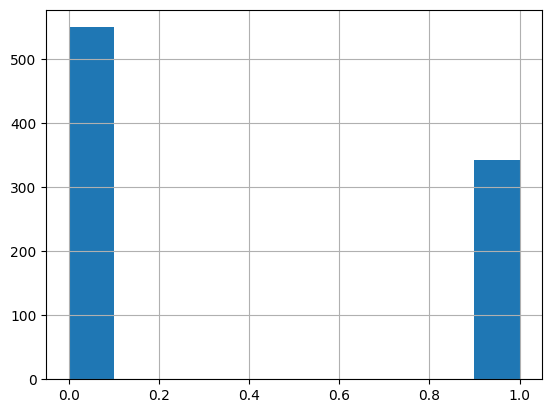

In [31]:
df_new.Survived.hist()

**Task 8.**
Чи були відмінності у виживанні серед пасажирів з різними титулами (Mr, Mrs, Dr тощо)?

In [32]:
df_mrs_1 = df_new[(df_new.Name.str.lower().str.contains('mrs. ')) & (df_new.Survived == 1)]
df_mrs_0 = df_new[(df_new.Name.str.lower().str.contains('mrs. ')) & (df_new.Survived == 0)]

print(len(df_mrs_1), len(df_mrs_0))

99 26
